In [2]:
import os
import cv2
import numpy as np
import random
from PIL import Image

from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [24]:
## 이미지 불러와서 이미지 크기를 임의의 크기 으로 이미지 리사이즈

# all_folders 은 폴더 명만 나와야됨(ex) green, red, yellow
all_folders = os.listdir("data/")
all_folders.remove(".DS_Store")

# 각 green, red, yellow 폴더에 들어가있는 신호등 이미지가 변환되서 저장됨(원본 사라짐)
for x in all_folders:
    path = 'data/'+x+'/' 
    file_list = os.listdir(path) # 폴더 하나마다 들어있는 파일들 리스트 저장

    for A in file_list:
        if A == ".DS_Store":
            continue
        img = cv2.imread(path + A)
        res = cv2.resize(img, dsize=(30, 10), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(path + A, res)

In [25]:
c = os.listdir("data")
c.remove(".DS_Store") #['.DS_Store','green','red','yellow']

print(c) # 0,1,2 지정할 때 순서 확인

['green', 'red', 'yellow']


In [26]:
class Data():
    def __init__(self):
        
        self.train_x = []
        self.train_y = []
        self.test_x = []
        self.test_y = []
        
        self.images()
        
    def images(self):
        data = []
        classes = os.listdir("data")
        if ".DS_Store" in classes:
            classes.remove(".DS_Store")
        for i, light in enumerate(classes): #green:0 red:1 yellow:2
            PATH = os.listdir("data/" + light)
            if ".DS_Store" in PATH:
                PATH.remove(".DS_Store")
            for x in PATH:
                img = Image.open("data/"+ light + "/" + x)
                data.append((np.asarray(img),i))
                img.close()
                
        random.shuffle(data)
        
        for i in range(len(data)):
            if i < 0.8*len(data):
                self.train_x.append(data[i][0])
                self.train_y.append(data[i][1])
            else:
                self.test_x.append(data[i][0])
                self.test_y.append(data[i][1])
                
        self.train_x = np.asarray(self.train_x) / 255.0
        self.test_x = np.asarray(self.test_x) / 255.0
        
        self.train_y = np.asarray(self.train_y)
        self.test_y = np.asarray(self.test_y)
        
        print("train x size : " + str(self.train_x.shape))
        print("train y size : " + str(self.train_y.shape))
        print("test x size : " + str(self.test_x.shape))
        print("test y size : " + str(self.test_y.shape))
        
    def draw_graph(history):
        train_history = history.history["loss"]
        validation_history = history.history["val_loss"]
        fig = plt.figure(figsize=(8, 8))
        plt.title("Loss History")
        plt.xlabel("EPOCH")
        plt.ylabel("LOSS Function")
        plt.plot(train_history, "red")
        plt.plot(validation_history, 'blue')
        fig.savefig("train_history.png")

        train_history = history.history["accuracy"]
        validation_history = history.history["val_accuracy"]
        fig = plt.figure(figsize=(8, 8))
        plt.title("Accuracy History")
        plt.xlabel("EPOCH")
        plt.ylabel("Accuracy")
        plt.plot(train_history, "red")
        plt.plot(validation_history, 'blue')
        fig.savefig("accuracy_history.png")

In [130]:
A = Data()

train x size : (3588, 10, 30, 3)
train y size : (3588,)
test x size : (896, 10, 30, 3)
test y size : (896,)


In [131]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64,(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    
    #keras.layers.Conv2D(128,(3,3), activation="relu"),
    #keras.layers.MaxPooling2D((2,2)),
    #keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation="softmax")
])

In [132]:
model.compile(optimizer="adam", metrics=["accuracy"],
             loss = "sparse_categorical_crossentropy")

In [133]:
Epochs = 10

In [134]:
history = model.fit(A.train_x,A.train_y, epochs=Epochs,
                   validation_data = (A.test_x,A.test_y))

Epoch 1/10
  1/113 [..............................] - ETA: 37s - loss: 1.0498 - accuracy: 0.6250

2022-03-03 15:20:36.680044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 1s 10ms/step - loss: 0.2567 - accuracy: 0.9156 - val_loss: 0.1116 - val_accuracy: 0.9632
Epoch 2/10
  8/113 [=>............................] - ETA: 0s - loss: 0.1466 - accuracy: 0.9609

2022-03-03 15:20:37.906490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 1s 9ms/step - loss: 0.1223 - accuracy: 0.9682 - val_loss: 0.2568 - val_accuracy: 0.9152
Epoch 3/10
113/113 [==============================] - 1s 9ms/step - loss: 0.1135 - accuracy: 0.9721 - val_loss: 0.0808 - val_accuracy: 0.9777
Epoch 4/10
113/113 [==============================] - 1s 9ms/step - loss: 0.0956 - accuracy: 0.9769 - val_loss: 0.0814 - val_accuracy: 0.9732
Epoch 5/10
113/113 [==============================] - 1s 9ms/step - loss: 0.0836 - accuracy: 0.9788 - val_loss: 0.1091 - val_accuracy: 0.9710
Epoch 6/10
113/113 [==============================] - 1s 9ms/step - loss: 0.0849 - accuracy: 0.9788 - val_loss: 0.0708 - val_accuracy: 0.9799
Epoch 7/10
113/113 [==============================] - 1s 9ms/step - loss: 0.0723 - accuracy: 0.9827 - val_loss: 0.0783 - val_accuracy: 0.9732
Epoch 8/10
113/113 [==============================] - 1s 9ms/step - loss: 0.0789 - accuracy: 0.9799 - val_loss: 0.0752 - val_accuracy: 0.9743
Epoch 9/10
113/11

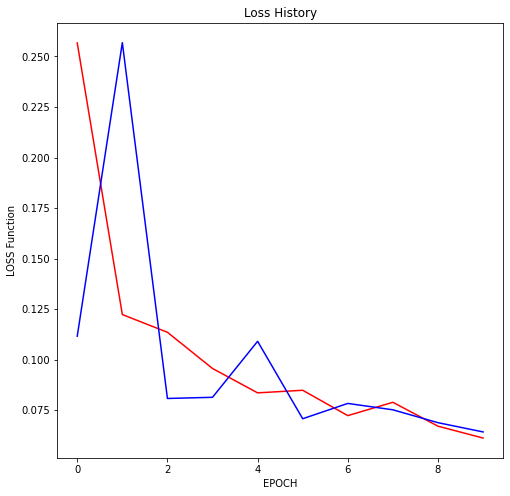

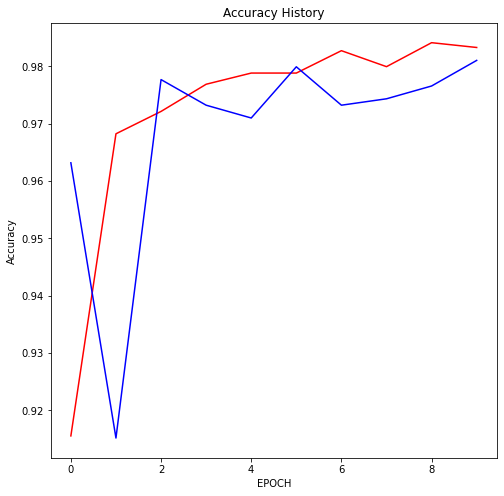

In [135]:
Data.draw_graph(history)

In [136]:
# 모델 저장
model.save("traffic_light.h5")

In [ ]:
# 모델 불러오기

In [3]:
model = tf.keras.models.load_model('traffic_light.h5')

Metal device set to: Apple M1


2022-03-03 15:22:55.937249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-03 15:22:55.938032: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 8, 28, 32)         896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 4, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 4, 14, 32)         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 2, 12, 64)         18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 1, 6, 64)         

In [4]:
Path2 = 'data_2/all/'
file_list = os.listdir(Path2)

if ".DS_Store" in file_list:
    file_list.remove(".DS_Store")

data2 = []

for A in file_list:
    if A == ".DS_Store":
        continue
    img2 = cv2.imread(Path2+A)
    res2 = cv2.resize(img2, dsize=(30,10), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(Path2+A,res2)
    
for A in file_list:
    if A == ".DS_Store":
        continue
    img3 = Image.open(Path2+A)
    data2.append(np.array(img3))
    img3.close()

In [5]:
data2 = np.asarray(data2)/255.0

In [6]:
prediction = model.predict(data2)

2022-03-03 15:23:18.233519: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-03 15:23:18.284347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [8]:
light_order = {0:"green",1:"red",2:"yellow"}

for i,x in enumerate(prediction):
    count = 0
    for y in x:
        if y > 0.999:
            count += 1
    if count > 0:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[np.argmax(x)])

3번째 신호등: 605.jpg red
11번째 신호등: 371.jpg red
14번째 신호등: 506.jpg red
27번째 신호등: 385.jpg green
